In [10]:
# pip install numpy scikit-learn matplotlib
import numpy as np
import matplotlib.pyplot as plt


# Week-6

**Note:**:

- For questions that involve plotting, just enter $0$ as the answer in the portal.



## Dataset

Run the cell given below to generate the data-matrix $X$ and target vector $y$. $X$ is of shape $(n, d)$, where $n$ denotes the number of samples and $d$ denotes the number of features. $y$ is of shape $(n,)$. You will be using this dataset for the rest of the assignment.

**Do not edit this cell.**

In [22]:
from sklearn.datasets import load_diabetes
X, y = load_diabetes(return_X_y = True)

# set the random seed value to 0
np.random.seed(0)
seed_value = 0

## Problem 1
How many samples are there in the dataset?



## Solution

In [16]:
# Write your solution code here
n_samples = X.shape[0]
print(f"Number of samples (n): {n_samples}")

Number of samples (n): 442


## Problem 2

How many features are there in the dataset?



## Solution

In [18]:
# Write your solution code here
n_features = X.shape[1]
print(f"Number of features (d): {n_features}")

Number of features (d): 10


## Problem 3
Write a function `shuffle_data(X, y)` that returns the shuffled $X$ and $y$.

Note that it should shuffle the data pairs $(x_i, y_i)$.

What will be the mean of the first 5 values in $y$?



In [24]:
# Write your solution code here
# Problem 3 Solution
def shuffle_data(X, y):
    """Shuffles the data pairs (X, y) in unison."""
    # Use the same seed for reproducibility as set earlier
    np.random.seed(seed_value)
    
    # Get the number of samples
    n = X.shape[0]
    # Create an array of indices
    indices = np.arange(n)
    # Shuffle the indices
    np.random.shuffle(indices)
    
    # Use the shuffled indices to reorder X and y
    X_shuffled = X[indices]
    y_shuffled = y[indices]
    
    return X_shuffled, y_shuffled

# Shuffle the original dataset
X_shuffled, y_shuffled = shuffle_data(X, y)

# Calculate the mean of the first 5 values in the shuffled y
mean_first_5 = np.mean(y_shuffled[:5])

print(f"Shuffled y (first 5 values): {y_shuffled[:5]}")
print(f"Mean of the first 5 values in shuffled y: {mean_first_5:.4f}")

Shuffled y (first 5 values): [321. 215. 127.  64. 175.]
Mean of the first 5 values in shuffled y: 180.4000


## Problem 4

Write a function `train_test_split(X, y, test_size)` that divides the data (X, y) into $X_{train}$, $X_{test}$, $y_{train}$, $y_{test}$ respectively as per test_size which should be a value between 0 and 1.

That is, if test_size = $t$, then `int(t*n)` data points should go to test and the remaining data points should go to train.

$X_{train}$, $X_{test}$, $y_{train}$, $y_{test}$ should be returned by the function.

Set the test_size to be 0.25 and output the sum of all y values settling in $y_{test}$.








In [26]:
# Write your solution code here
# Problem 4 Solution
def train_test_split(X, y, test_size):
    """Splits data into train and test sets based on test_size."""
    n = X.shape[0]
    # Calculate the number of test samples
    n_test = int(test_size * n)
    
    # The data is already shuffled from Problem 3, so we can split it directly
    # Ensure to use the shuffled data
    
    X_train = X[:n-n_test]
    y_train = y[:n-n_test]
    X_test = X[n-n_test:]
    y_test = y[n-n_test:]
    
    return X_train, X_test, y_train, y_test

# Use the shuffled data (X_shuffled, y_shuffled)
TEST_SIZE = 0.25
X_train, X_test, y_train, y_test = train_test_split(X_shuffled, y_shuffled, TEST_SIZE)

# Output the sum of all y values settling in y_test
sum_y_test = np.sum(y_test)

print(f"Test size: {TEST_SIZE}")
print(f"Sum of y values in y_test: {sum_y_test:.4f}")

Test size: 0.25
Sum of y values in y_test: 16960.0000


## Problem 5

What are the shapes of $X_{train}$, $X_{test}$, $y_{train}$, $y_{test}$ respectively?



In [28]:
# Write your solution code here
# Problem 5 Solution
# Using the variables from Problem 4
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of X_train: (332, 10)
Shape of X_test: (110, 10)
Shape of y_train: (332,)
Shape of y_test: (110,)


## Problem 6
Add a dummy feature, i.e., a column containing all 1's (as the first column) in $X_{train}$ and $X_{test}$.

Take the transpose of both $X_{train}$ and $X_{test}$.

What are the shapes of $X_{train}$ and $X_{test}$?



In [30]:

# Write your solution code here
# Problem 6 Solution

# 1. Add dummy feature (column of ones) as the first column
# For X_train
ones_train = np.ones((X_train.shape[0], 1))
X_train_augmented = np.hstack((ones_train, X_train))

# For X_test
ones_test = np.ones((X_test.shape[0], 1))
X_test_augmented = np.hstack((ones_test, X_test))

# 2. Take the transpose
X_train = X_train_augmented.T
X_test = X_test_augmented.T

# 3. Output the new shapes
print(f"New shape of X_train (Transposed): {X_train.shape}")
print(f"New shape of X_test (Transposed): {X_test.shape}")

New shape of X_train (Transposed): (11, 332)
New shape of X_test (Transposed): (11, 110)


## Problem 7

Write a function `compute_weights(X, y)` that uses the closed form formula of linear regression and returns a weight vector.

Call this function by passing $X_{train}$ and $y_{train}$. As the dummy feature was added as the first column, the first value in the weight vector will be the intercept. What is its value (rounded to one decimal place)?



In [32]:
# Write your solution code here
# Problem 7 Solution
def compute_weights(X, y):
    """
    Computes the weight vector using the closed-form solution for Linear Regression.
    Assumes X is (d+1, n) and y is (n,).
    Formula: w = (X * X_T)^-1 * X * y
    """
    # X @ X.T is (d+1, d+1)
    XTX_inv = np.linalg.inv(X @ X.T)
    # XTX_inv @ X is (d+1, n)
    # (XTX_inv @ X) @ y is (d+1,) which is the weight vector
    weights = XTX_inv @ X @ y
    return weights

# Compute weights
w_lr = compute_weights(X_train, y_train)

# The intercept is the first element (due to the dummy feature being the first row after transpose)
intercept_lr = w_lr[0]

print(f"Weight vector (first 5 elements): {w_lr[:5]}")
print(f"Intercept (first value in weight vector): {intercept_lr:.4f}")
print(f"Intercept rounded to one decimal place: {round(intercept_lr, 1)}")

Weight vector (first 5 elements): [ 150.80818855  -37.55141005 -236.69770894  495.94156781  332.66085205]
Intercept (first value in weight vector): 150.8082
Intercept rounded to one decimal place: 150.8


## Problem 8

Write a function `MSE(X, y, w)` that returns the mean squared error for the given `X`, `y` as per `w` values.

Using this function, compute the train error and test error.

Note: Here `y` is the true `y` for `X`.

Compute both train and test error.

What is the value of test error?


In [34]:

# Write your solution code here
# Problem 8 Solution
def MSE(X, y, w):
    """
    Computes the Mean Squared Error.
    Assumes X is (d+1, n), y is (n,), and w is (d+1,).
    Prediction: y_pred = w.T @ X
    """
    n = X.shape[1]
    
    # Calculate predictions: w.T @ X is (1, d+1) @ (d+1, n) = (1, n). We use w @ X
    # w is (d+1,), X is (d+1, n). np.dot(w, X) is (n,)
    y_pred = w @ X
    
    # Calculate MSE
    mse = np.mean((y - y_pred)**2)
    return mse

# Compute Train Error
train_error_lr = MSE(X_train, y_train, w_lr)

# Compute Test Error
test_error_lr = MSE(X_test, y_test, w_lr)

print(f"Train Error (Linear Regression): {train_error_lr:.4f}")
print(f"Test Error (Linear Regression): {test_error_lr:.4f}")
print(f"Value of Test Error: {test_error_lr:.4f}")

Train Error (Linear Regression): 2921.8875
Test Error (Linear Regression): 2745.4301
Value of Test Error: 2745.4301


## Problem 9

Write a function `compute_weights_ridge(X, y)` that uses the closed form formula of Ridge regression and returns a weight vector.

Call this function by passing  `X_train`, `y_train` and 0.3 as the value of regularization strength.


Find the sum of values in the weight vector obtained. How much reduction in total sum of weights is achieved with respect to the the weight vector obtained from 'plain' linear regression (without regularization) computed earlier.


In [36]:
# Write your solution code here
# Problem 9 Solution
def compute_weights_ridge(X, y, reg_strength):
    """
    Computes the weight vector using the closed-form solution for Ridge Regression.
    Assumes X is (d+1, n), y is (n,).
    Formula: w = (X * X_T + lambda*I)^-1 * X * y
    """
    d_plus_1 = X.shape[0]
    # Create the identity matrix (I)
    I = np.identity(d_plus_1)
    
    # Calculate the term (X @ X.T + lambda * I)
    term_to_invert = X @ X.T + reg_strength * I
    
    # Compute the inverse and the final weights
    weights = np.linalg.inv(term_to_invert) @ X @ y
    return weights

# Set regularization strength
LAMBDA = 0.3

# Compute Ridge weights
w_ridge = compute_weights_ridge(X_train, y_train, LAMBDA)

# Sum of weights for Ridge Regression
sum_w_ridge = np.sum(w_ridge)
print(f"Sum of weights (Ridge, lambda={LAMBDA}): {sum_w_ridge:.4f}")

# Sum of weights for Linear Regression (from Problem 7)
sum_w_lr = np.sum(w_lr)
print(f"Sum of weights (Linear Regression): {sum_w_lr:.4f}")

# Calculate the reduction
# Reduction = sum_w_lr - sum_w_ridge
reduction_in_sum_of_weights = sum_w_lr - sum_w_ridge

print(f"Reduction in total sum of weights: {reduction_in_sum_of_weights:.4f}")

Sum of weights (Ridge, lambda=0.3): 982.5270
Sum of weights (Linear Regression): 1662.5620
Reduction in total sum of weights: 680.0350


## Problem 10

Compute the train error and test error. What is their absolute difference?



In [38]:
# Write your solution code here
# Problem 10 Solution
# Compute Train Error using Ridge weights (w_ridge)
train_error_ridge = MSE(X_train, y_train, w_ridge)

# Compute Test Error using Ridge weights (w_ridge)
test_error_ridge = MSE(X_test, y_test, w_ridge)

# Calculate the absolute difference
abs_diff_error = np.abs(train_error_ridge - test_error_ridge)

print(f"Train Error (Ridge, lambda={LAMBDA}): {train_error_ridge:.4f}")
print(f"Test Error (Ridge, lambda={LAMBDA}): {test_error_ridge:.4f}")
print(f"Absolute difference between train and test error: {abs_diff_error:.4f}")

Train Error (Ridge, lambda=0.3): 3058.8016
Test Error (Ridge, lambda=0.3): 2959.3319
Absolute difference between train and test error: 99.4697


## Problem 11

Use 10 different values between 0 and 5 as the regularization strength and keep a record of the weight vectors obtained for each. Further, calculate the sum of weights for each weight vector.

Plot these sums of weights (on y-axis) with respect to the regularization strength (on x-axis) and observe the reduction in (sum of) weights.



<>:25: SyntaxWarning: invalid escape sequence '\l'
<>:26: SyntaxWarning: invalid escape sequence '\l'
<>:27: SyntaxWarning: invalid escape sequence '\s'
<>:25: SyntaxWarning: invalid escape sequence '\l'
<>:26: SyntaxWarning: invalid escape sequence '\l'
<>:27: SyntaxWarning: invalid escape sequence '\s'
C:\Users\alokg\AppData\Local\Temp\ipykernel_12052\10954170.py:25: SyntaxWarning: invalid escape sequence '\l'
  plt.title('Sum of Weights vs. Regularization Strength ($\lambda$)')
C:\Users\alokg\AppData\Local\Temp\ipykernel_12052\10954170.py:26: SyntaxWarning: invalid escape sequence '\l'
  plt.xlabel('Regularization Strength ($\lambda$)')
C:\Users\alokg\AppData\Local\Temp\ipykernel_12052\10954170.py:27: SyntaxWarning: invalid escape sequence '\s'
  plt.ylabel('Sum of Weights ($\sum w_i$)')


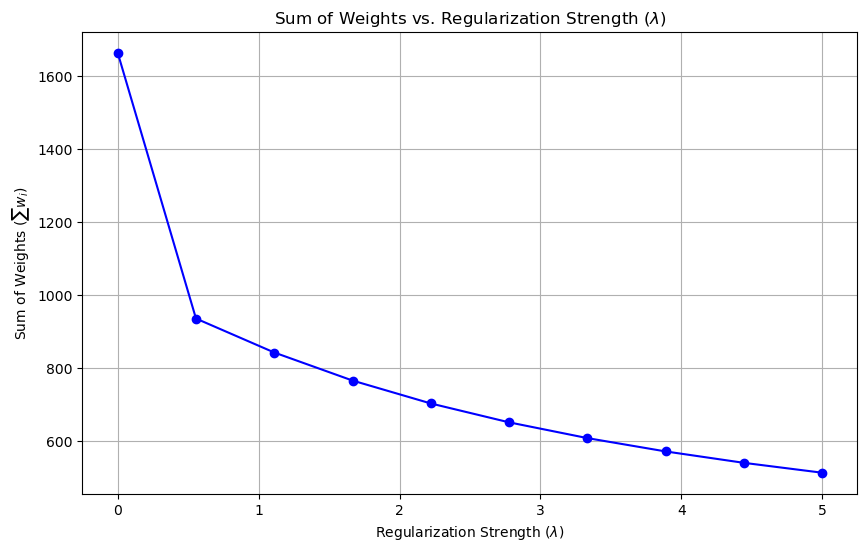

Regularization Strengths (lambda): ['0.00', '0.56', '1.11', '1.67', '2.22', '2.78', '3.33', '3.89', '4.44', '5.00']
Sum of Weights for each lambda: ['1662.5620', '934.4055', '841.3531', '764.5072', '701.7456', '650.0302', '606.8572', '570.3413', '539.0828', '512.0354']


In [40]:
# Write your solution code here
# Problem 11 Solution
import matplotlib.pyplot as plt

# Generate 10 different regularization strength values between 0 and 5
lambda_values = np.linspace(0, 5, 10)

# List to store the sum of weights for each lambda
sum_of_weights_list = []

# Iterate through each lambda value
for lam in lambda_values:
    # Compute the weights using the Ridge function
    w_current = compute_weights_ridge(X_train, y_train, lam)
    
    # Calculate the sum of the weights
    sum_w_current = np.sum(w_current)
    
    # Store the sum
    sum_of_weights_list.append(sum_w_current)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(lambda_values, sum_of_weights_list, marker='o', linestyle='-', color='blue')
plt.title('Sum of Weights vs. Regularization Strength ($\lambda$)')
plt.xlabel('Regularization Strength ($\lambda$)')
plt.ylabel('Sum of Weights ($\sum w_i$)')
plt.grid(True)
plt.show()

# As requested, output the list of sums for completeness:
print("Regularization Strengths (lambda):", [f"{l:.2f}" for l in lambda_values])
print("Sum of Weights for each lambda:", [f"{s:.4f}" for s in sum_of_weights_list])